In [1]:
from qiskit.aqua.algorithms import NumPyMinimumEigensolver
from qiskit.optimization.algorithms import GroverOptimizer, MinimumEigenOptimizer
from qiskit.optimization.problems import QuadraticProgram
from qiskit import BasicAer
from docplex.mp.model import Model

backend = BasicAer.get_backend('statevector_simulator')

In [3]:
model = Model()
x0 = model.binary_var(name='x0')
x1 = model.binary_var(name='x1')
x2 = model.binary_var(name='x2')
model.minimize(-x0+2*x1-3*x2-2*x0*x2-1*x1*x2)
qp = QuadraticProgram()
qp.from_docplex(model)
print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: docplex_model1

Minimize
 obj: - x0 + 2 x1 - 3 x2 + [ - 4 x0*x2 - 2 x1*x2 ]/2
Subject To

Bounds
 0 <= x0 <= 1
 0 <= x1 <= 1
 0 <= x2 <= 1

Binaries
 x0 x1 x2
End



In [4]:
grover_optimizer = GroverOptimizer(6, num_iterations=10, quantum_instance=backend)
results = grover_optimizer.solve(qp)
print("x={}".format(results.x))
print("fval={}".format(results.fval))

x=[1 0 1]
fval=-6.0


In [5]:
import matplotlib.pyplot as plt
import matplotlib.axes as axes
%matplotlib inline
import numpy as np
import networkx as nx

from qiskit.aqua import QuantumInstance
from qiskit.optimization.applications.ising import max_cut, tsp
from qiskit.optimization.converters import IsingToQuadraticProgram


distance
 [[ 0. 48. 91. 33.]
 [48.  0. 63. 71.]
 [91. 63.  0. 92.]
 [33. 71. 92.  0.]]


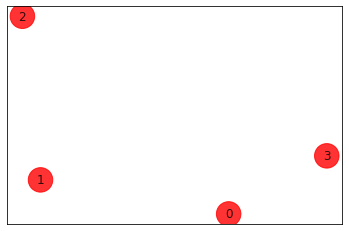

In [6]:
n = 4
num_qubits = n ** 2
ins = tsp.random_tsp(n, seed=123)
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
colors = ['r' for node in G.nodes()]
pos = {k: v for k, v in enumerate(ins.coord)}
default_axes = plt.axes(frameon=True)
nx.draw_networkx(G, node_color=colors, node_size=600, alpha=.8, ax=default_axes, pos=pos)
print('distance\n', ins.w)

In [7]:
qubitOp, offset = tsp.get_operator(ins)
print('Offset:', offset)
print('Ising Hamiltonian:')
print(qubitOp.print_details())

Offset: 1600796.0
Ising Hamiltonian:
IIIIIIIIIIIIIIIZ	(-200086+0j)
IIIIIIIIIIZIIIII	(-200091+0j)
IIIIIIIIIIZIIIIZ	(12+0j)
IIIIIIIIIIIIIIZI	(-200086+0j)
IIIIIIIIIZIIIIII	(-200091+0j)
IIIIIIIIIZIIIIZI	(12+0j)
IIIIIIIIIIIIIZII	(-200086+0j)
IIIIIIIIZIIIIIII	(-200091+0j)
IIIIIIIIZIIIIZII	(12+0j)
IIIIIIIIIIIIZIII	(-200086+0j)
IIIIIIIIIIIZIIII	(-200091+0j)
IIIIIIIIIIIZZIII	(12+0j)
IIIIIIZIIIIIIIII	(-200123+0j)
IIIIIIZIIIIIIIIZ	(22.75+0j)
IIIIIZIIIIIIIIII	(-200123+0j)
IIIIIZIIIIIIIIZI	(22.75+0j)
IIIIZIIIIIIIIIII	(-200123+0j)
IIIIZIIIIIIIIZII	(22.75+0j)
IIIIIIIZIIIIIIII	(-200123+0j)
IIIIIIIZIIIIZIII	(22.75+0j)
IIZIIIIIIIIIIIII	(-200098+0j)
IIZIIIIIIIIIIIIZ	(8.25+0j)
IZIIIIIIIIIIIIII	(-200098+0j)
IZIIIIIIIIIIIIZI	(8.25+0j)
ZIIIIIIIIIIIIIII	(-200098+0j)
ZIIIIIIIIIIIIZII	(8.25+0j)
IIIZIIIIIIIIIIII	(-200098+0j)
IIIZIIIIIIIIZIII	(8.25+0j)
IIIIIIIIIIIZIIZI	(12+0j)
IIIIIIIIIIZIIZII	(12+0j)
IIIIIIIIIZIIZIII	(12+0j)
IIIIIIIIZIIIIIIZ	(12+0j)
IIIIIIZIIIIZIIII	(15.75+0j)
IIIIIZIIIIZIIIII	(15.75+0j)
IIIIZII

In [8]:
qp = QuadraticProgram()
qp.from_ising(qubitOp, offset, linear=True)
qp.to_docplex().prettyprint()

// This file has been generated by DOcplex
// model name is: AnonymousModel
// single vars section
dvar bool x_0;
dvar bool x_1;
dvar bool x_2;
dvar bool x_3;
dvar bool x_4;
dvar bool x_5;
dvar bool x_6;
dvar bool x_7;
dvar bool x_8;
dvar bool x_9;
dvar bool x_10;
dvar bool x_11;
dvar bool x_12;
dvar bool x_13;
dvar bool x_14;
dvar bool x_15;

minimize
 - 200000 x_0 - 200000 x_1 - 200000 x_2 - 200000 x_3 - 200000 x_4 - 200000 x_5
 - 200000 x_6 - 200000 x_7 - 200000 x_8 - 200000 x_9 - 200000 x_10
 - 200000 x_11 - 200000 x_12 - 200000 x_13 - 200000 x_14 - 200000 x_15 [
 200000 x_0*x_1 + 200000 x_0*x_2 + 200000 x_0*x_3 + 200000 x_0*x_4
 + 48 x_0*x_5 + 48 x_0*x_7 + 200000 x_0*x_8 + 91 x_0*x_9 + 91 x_0*x_11
 + 200000 x_0*x_12 + 33 x_0*x_13 + 33 x_0*x_15 + 200000 x_1*x_2
 + 200000 x_1*x_3 + 48 x_1*x_4 + 200000 x_1*x_5 + 48 x_1*x_6 + 91 x_1*x_8
 + 200000 x_1*x_9 + 91 x_1*x_10 + 33 x_1*x_12 + 200000 x_1*x_13 + 33 x_1*x_14
 + 200000 x_2*x_3 + 48 x_2*x_5 + 200000 x_2*x_6 + 48 x_2*x_7 + 91 x_2*x_

In [11]:
grover_optimizer = GroverOptimizer(6, num_iterations=10, quantum_instance=backend)
results = grover_optimizer.solve(qp)
print("x={}".format(results.x))
print("fval={}".format(results.fval))

ValueError: probabilities are not non-negative

In [ ]:
# Test with classical EigenOptimizer
from qiskit.aqua.algorithms import NumPyMinimumEigensolver
from qiskit.optimization.algorithms import MinimumEigenOptimizer
exact_solver = MinimumEigenOptimizer(NumPyMinimumEigensolver())
exact_result = exact_solver.solve(qp)`
print("x={}".format(exact_result.x))
print("fval={}".format(exact_result.fval))